# Исследование удовлетворённости авиаперелётами средствами разведовательного анализа данных и машинного обучения

Проект в рамках курса ВШЭ "Разработка ML сервиса: от идеи к прототипу", июнь 2023г. Анализ датасета об удовлетворённости пассажиров авиаперелётами. Включает в себя очистку данных, преобработку,  исследовательский анализ, визуализацию связей между различными признаками с помощью графиков, машинное обучение.
Цель анализа: выяснить какие характеристики влияют на удовлетворённость авиапассажира и каким именно образом.

### Загрузка данных и первичное ознакомление

In [ ]:
# Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Загрузим датасет
clients = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv")

In [ ]:
# Выведем на экран все столбцы
pd.set_option('display.max_columns', None)
clients.head(10)

id  Gender   Age      Customer Type   Type of Travel     Class  \
0   1    Male  48.0  disloyal Customer  Business travel  Business   
1   2  Female  35.0     Loyal Customer  Business travel  Business   
2   3    Male  41.0     Loyal Customer  Business travel  Business   
3   4    Male  50.0     Loyal Customer  Business travel  Business   
4   5  Female  49.0     Loyal Customer  Business travel  Business   
5   6    Male  43.0     Loyal Customer  Business travel  Business   
6   7    Male  43.0     Loyal Customer  Business travel  Business   
7   8  Female  60.0     Loyal Customer  Business travel  Business   
8   9    Male  50.0     Loyal Customer  Business travel  Business   
9  10  Female  38.0     Loyal Customer  Business travel  Business   

   Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            821.0                         2.0                       5.0   
1            821.0                        26.0                      39.0   
2            853.0                         0.0                       0.0   
3           1905.0                         0.0                       0.0   
4           3470.0                         0.0                       1.0   
5           3788.0                         0.0                       0.0   
6           1963.0                         0.0                       0.0   
7            853.0                         0.0                       3.0   
8           2607.0                         0.0                       0.0   
9           2822.0                        13.0                       0.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                    3.0                                3.0   
1                    2.0                                2.0   
2                    4.0                                4.0   
3                    2.0                                2.0   
4                    3.0                                3.0   
5                    4.0                                4.0   
6                    3.0                                3.0   
7                    4.0                                3.0   
8                    4.0                                1.0   
9                    2.0                                2.0   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                     3.0            3.0             5.0              3.0   
1                     2.0            2.0             3.0              5.0   
2                     4.0            4.0             5.0              5.0   
3                     2.0            2.0             4.0              4.0   
4                     3.0            3.0             4.0              5.0   
5                     4.0            4.0             3.0              5.0   
6                     3.0            3.0             5.0              4.0   
7                     4.0            4.0             4.0              4.0   
8                     1.0            1.0             3.0              2.0   
9                     5.0            2.0             2.0              5.0   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0           5.0                     5.0               3.0               2.0   
1           4.0                     5.0               5.0               5.0   
2           5.0                     3.0               3.0               3.0   
3           5.0                     5.0               5.0               5.0   
4           4.0                     3.0               3.0               4.0   
5           4.0                     4.0               4.0               4.0   
6           5.0                     5.0               5.0               5.0   
7           4.0                     3.0               3.0               4.0   
8           3.0                     4.0               4.0               4.0   
9           4.0                     5.0               5.0               5.

In [ ]:
# Выясним размер датасета
clients.shape

(129880, 24)

В датасете 24 колонки и 129880 строк.

In [ ]:
# Выведем общую информацию о даттасете на экран
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

В 22 столбцах есть пропуски, но в количественно их немного, меньше 1%.

In [ ]:
# Выведем числовую информацию по столбцам на экран
clients.describe()

id            Age  Flight Distance  \
count  129880.000000  129564.000000    129786.000000   
mean    64940.500000      40.113951      1323.385804   
std     37493.270818      20.365190      4516.191530   
min         1.000000       0.000000         0.000000   
25%     32470.750000      27.000000       414.000000   
50%     64940.500000      40.000000       846.000000   
75%     97410.250000      51.000000      1744.000000   
max    129880.000000     621.000000    379620.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  \
count               129773.000000             129371.000000   
mean                    15.811301                 16.651406   
std                     93.206139                109.167328   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      0.000000                  0.000000   
75%                     12.000000                 13.000000   
max                  22227.000000              14006.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          129835.000000                      129831.000000   
mean                2.732183                           3.061857   
std                 1.359786                           1.559323   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                45.000000                          45.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           129837.000000  129842.000000   129830.000000    129834.000000   
mean                 2.760523       2.981424        3.208349         3.256674   
std                  1.430800       1.312628        1.357649         1.381889   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                 45.000000      36.000000       45.000000        40.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  129832.000000           129833.000000     129836.000000   
mean        3.445691                3.361395          3.387181   
std         1.349732                1.366866          1.335540   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max        45.000000               45.000000         45.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     129834.000000     129832.000000    129838.000000      129817.00000   
mean           3.356101          3.636107         3.310056           3.64718   
std            1.361633          1.221818         1.298626           1.21837   
min            0.000000          0.000000         0.000000           0.00000   
25%            2.000000          3.000000         3.000000           3.00000   
50%            4.000000          4.000000         3.000000           4.00000   
75%            4.000000          5.000000         4.000000           5.00000   
max           40.000000         40.000000        45.000000          40.00000   

         Cleanliness  
count  129843.000000  
mean        3.289865  
std         1.347625  
min         0.000000  
25%         2.000000  
50%         3.000000  
75%         4.000000  
max        45.000000

В 17 столбцах из 19 в качестве минимальных и максимальных значений указаны ошибочные данные: 0 и величины больше 5 (из описания данных мы знаем, что пассажиры оценивали разные характеристики полета по 5тибальной шкале от 1 до 5).

In [ ]:
# Посмотрим на нечисловые столбцы
clients.describe(include='object')

Gender   Customer Type   Type of Travel     Class  \
count   129549          129803           129779    129764   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     65726          106040            89625     62103   

                   satisfaction  
count                    129880  
unique                        3  
top     neutral or dissatisfied  
freq                      58879

В 3 из 5 нечисловых столбца всего по 2 уникальных значения. Вдальнейшем их можно заменить на булевый показатель для большего удобства в исследовании.

In [ ]:
# Напишем функцию для унификации названий столбцов и первичного анализа датасета
def df_info(dataset):
    dataset.columns = dataset.columns.str.lower().str.replace(' ','_')
    for column in dataset.columns:
        print('Название столбца:     ',column)
        print('Количество пропусков: ',dataset[column].isna().sum())
        print('Тип данных в столбце: ',dataset[column].dtype)
        print('Уникальные значения:      ')
        print(dataset[column].unique())
        print('----------------')
    print('Количество дубликатов: ',dataset.duplicated().sum())

In [ ]:
# Изучим информацию по каждому столбцу
df_info(clients)

Название столбца:      id
Количество пропусков:  0
Тип данных в столбце:  int64
Уникальные значения:      
[     1      2      3 ... 129878 129879 129880]
----------------
Название столбца:      gender
Количество пропусков:  331
Тип данных в столбце:  object
Уникальные значения:      
['Male' 'Female' nan]
----------------
Название столбца:      age
Количество пропусков:  316
Тип данных в столбце:  float64
Уникальные значения:      
[ 48.  35.  41.  50.  49.  43.  60.  38.  28.  27.  24.   9.  52.  70.
  61.  11.  42.  14.  56.  77.  51.  47.  58. 320.  21.  33.  39.  54.
  46.  45.  23.  40.  20.  44.  37.  36.  57.  31.  53.  25. 184.  55.
  72.  19.  65.  32.  80.   7.  34.  18.  12.  26.  17.  66.  68.  67.
  59.  69.  16.  22.  64.  29.  10.  71.  30.  88.  62.  63.   8.  15.
 176.  nan 300.  73.  78.  74.  79.  13. 272. 621. 210.  90.  96.  82.
 522.  76. 174. 220. 160.  75. 504. 104. 141. 318. 222. 150. 306.   0.
 102. 285. 177. 147. 434. 100. 120. 117. 207. 376.  85. 245. 312. 

Названия столбцов были приведены в единообразный вид. Дубликаты не обнаружены. Выявлены следующие проблемы в данных: присутствуют пропуски, присутствуют аномалии и ошибочные значения, некоторые столбцы требуют предобработки перед анализом и визуализацией.

### Обработка пропущенных значений

В некоторых категориальных столбцах есть пропуски, но их очень мало, менее 1%. Если мы заменим пропуски на "unknown" или его аналоги, то новая категория будет отрисовываться во всех графиках и поскольку она так мала, то и на графике её почти не будет видно. Поэтому для большего удобства удалим эти строки.

In [ ]:
# Удалим строки с пропущенными значениями в категориальных столбцах
clients = clients.dropna(subset = ['gender', 'customer_type', 'type_of_travel', 'class'])


In [ ]:
clients.shape

(129255, 24)

Всего было удалено 625 строк, это менее 0.5% датасета.

In [ ]:
# Проверим столбец satisfaction
clients['satisfaction'].value_counts()

neutral or dissatisfied    58578
satisfied                  44823
-                          25854
Name: satisfaction, dtype: int64

In [ ]:
# Заменим малопонятное значение "-" на "unknown"
clients['satisfaction'] = clients['satisfaction'].replace(['-'], 'unknown')

<ipython-input-13-d20ebf9f19ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['satisfaction'] = clients['satisfaction'].replace(['-'], 'unknown')


In [ ]:
# Проверим замену
clients['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied', 'unknown'], dtype=object)

In [ ]:
# В числовых колонках заменяем пропущенные значения на средние
columns = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking',\
           'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service',\
           'inflight_service', 'cleanliness']
for col in columns:
    mean=clients[col].mean()
    clients[col].fillna(mean, inplace=True)

In [ ]:
# Проверяем замену
clients[['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking',\
           'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service',\
           'inflight_service', 'cleanliness']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129255 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   age                                129255 non-null  float64
 1   flight_distance                    129255 non-null  float64
 2   departure_delay_in_minutes         129255 non-null  float64
 3   arrival_delay_in_minutes           129255 non-null  float64
 4   inflight_wifi_service              129255 non-null  float64
 5   departure/arrival_time_convenient  129255 non-null  float64
 6   ease_of_online_booking             129255 non-null  float64
 7   gate_location                      129255 non-null  float64
 8   food_and_drink                     129255 non-null  float64
 9   online_boarding                    129255 non-null  float64
 10  seat_comfort                       129255 non-null  float64
 11  inflight_entertainment             1292

### Обработка ошибочных значений

In [ ]:
# Заменим нулевые значения и значения выше 5 баллов на средний балл
columns = ['inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment',\
           'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']
for col in columns:
    clients[col] = np.where((clients[col] == 0) | (clients[col] > 5), clients[col].mean(), clients[col])

In [ ]:
# Проверим замену
clients[['inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment',\
           'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']].describe()

inflight_wifi_service  departure/arrival_time_convenient  \
count          129255.000000                      129255.000000   
mean                2.811403                           3.215869   
std                 1.239065                           1.350515   
min                 1.000000                           1.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.062574   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       ease_of_online_booking  gate_location  food_and_drink  online_boarding  \
count           129255.000000  129255.000000   129255.000000    129255.000000   
mean                 2.878248       2.977429        3.207942         3.330110   
std                  1.271670       1.278374        1.325359         1.251467   
min                  1.000000       1.000000        1.000000         1.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.256956   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        seat_comfort  inflight_entertainment  on-board_service  \
count  129255.000000           129255.000000     129255.000000   
mean        3.441250                3.358289          3.383091   
std         1.318768                1.333077          1.286746   
min         1.000000                1.000000          1.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       leg_room_service  baggage_handling  checkin_service  inflight_service  \
count     129255.000000     129255.000000    129255.000000     129255.000000   
mean           3.366305          3.632028         3.306554          3.642331   
std            1.295763          1.179863         1.265932          1.176429   
min            1.000000          1.000000         1.000000          1.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         cleanliness  
count  129255.000000  
mean        3.286328  
std         1.312692  
min         1.000000  
25%         2.000000  
50%         3.000000  
75%         4.000000  
max         5.000000

Мы знаем, что пассажиры оценивали сервис по 5тибальной шкале, однако в исследуемых столбцах попадаются дробные числа. Приведем их к целым значениям для бОльшего удобства.

In [ ]:
def categorize_score(score):
      if 1 <= score < 1.5:
        return 1
      elif 1.5 <= score < 2.5:
        return 2
      elif 2.5 <= score < 3.5:
        return 3
      elif 3.5 <= score < 4.5:
        return 4
      elif 4.5 <= score <= 5:
        return 5

In [ ]:
clients[['inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment',\
           'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']] = clients[['inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment',\
           'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']].applymap(categorize_score)

In [ ]:
# Изучим оставшиеся столбцы
clients[['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']].describe()

age  flight_distance  departure_delay_in_minutes  \
count  129255.00000    129255.000000               129255.000000   
mean       40.11223      1323.182516                   15.805154   
std        20.33400      4521.026248                   93.328033   
min         0.00000         0.000000                    0.000000   
25%        27.00000       414.000000                    0.000000   
50%        40.00000       846.000000                    0.000000   
75%        51.00000      1744.000000                   12.000000   
max       621.00000    379620.000000                22227.000000   

       arrival_delay_in_minutes  
count             129255.000000  
mean                  16.651301  
std                  109.176341  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                14006.000000

Видно, что присутствуют аномальные значения: в колонке с возрастом есть возраст 0 лет и 621 год, в колонке departure_delay есть задержка равная почти 15 дням, в колонке arrival_delay такая задержка - 9 дней. Для колонки "возраст" заменим на средние значения все аномальные значения, для оставшихся колонок изучим, какие значения стоит считать выбросами.

In [ ]:
# Делаем замену в колнке с возрастом
clients['age'] = np.where((clients['age'] == 0) | (clients['age'] > 130), clients['age'].mean(), clients['age'])

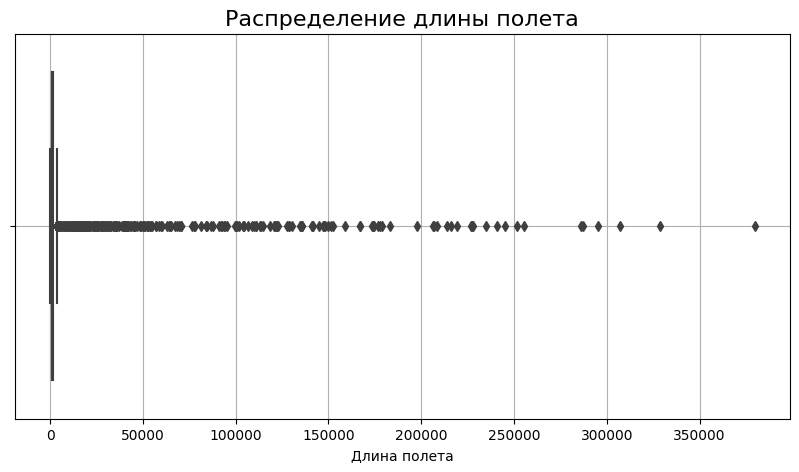

In [ ]:
# Построим боксплот по распределению длины полета
plt.figure(figsize=(10, 5))
sns.boxplot(x = clients['flight_distance']);
plt.title('Распределение длины полета', fontsize = 16)
plt.xlabel('Длина полета')
plt.grid()
plt.show()

Боксплот показывает наличие выбросов. Определим максимальное значение длины полета, после которого появляются выбросы.

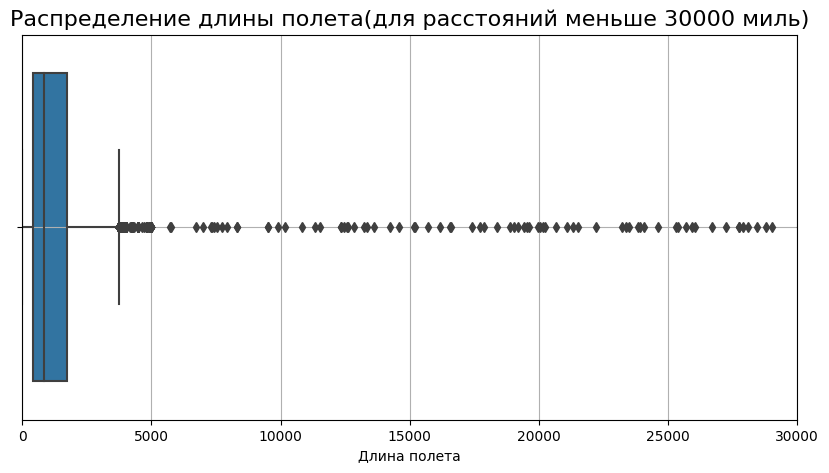

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = clients['flight_distance']);
plt.xlim([0, 30000])
plt.title('Распределение длины полета(для расстояний меньше 30000 миль)', fontsize = 16)
plt.xlabel('Длина полета')
plt.grid()
plt.show()

Из боксплота видно, что максимальное значение расстояния полета - примерно 4000 миль. После него располагаются выбросы. Проверим их количество.

In [ ]:
print('Количество строк с аномалиями в длине полёта:', clients[clients['flight_distance'] > 4000]['id'].count())
print('Процент от общего объема:', round(clients[clients['flight_distance'] > 4000]['id'].count()/clients.shape[0] * 100, 2), '%')

Количество строк с аномалиями в длине полёта: 312
Процент от общего объема: 0.24 %


Количество аномально длительных полётов в столбце "длина полёта" - незначительное, всего 0,24%. Значит, эти строки можно удалить без существенного вреда для анализа данных.

In [ ]:
clients.drop(clients[clients['flight_distance'] > 4000].index, inplace=True)

In [ ]:
clients.shape

(128943, 24)

Всего было удалено 315 строк, это менее 0,5%.

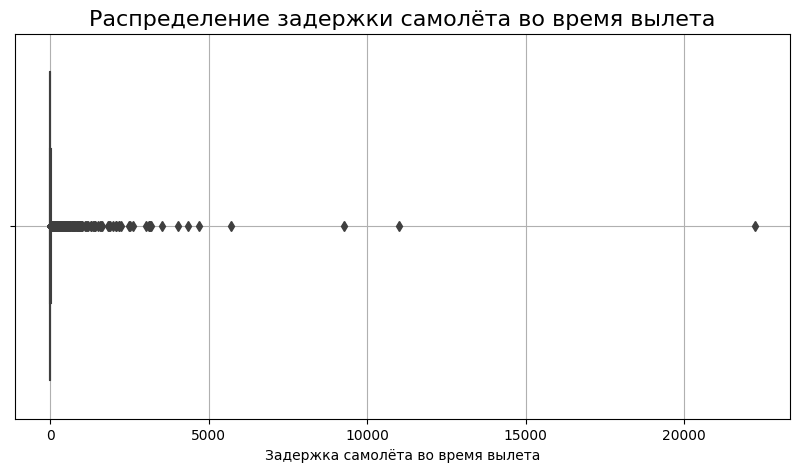

In [ ]:
# Построим боксплот по распределению задержки самолёта при вылете
plt.figure(figsize=(10, 5))
sns.boxplot(x = clients['departure_delay_in_minutes']);
plt.title('Распределение задержки самолёта во время вылета', fontsize = 16)
plt.xlabel('Задержка самолёта во время вылета')
plt.grid()
plt.show()

Здесь также присутствует много аномально долгих задержек. Определим максимальную задержку, которую ещё можно считать нормальной.

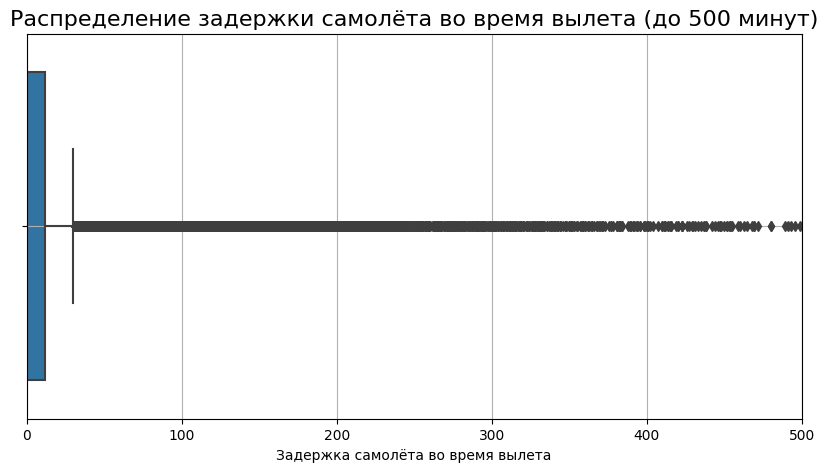

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = clients['departure_delay_in_minutes']);
plt.xlim([0, 500])
plt.title('Распределение задержки самолёта во время вылета (до 500 минут)', fontsize = 16)
plt.xlabel('Задержка самолёта во время вылета')
plt.grid()
plt.show()

Из графика видно, что задержки дольше примерно 30 минут являются аномальными. Посчитаем их количество.

In [ ]:
print('Количество строк с аномалиями в задержке при вылете:', clients[clients['departure_delay_in_minutes'] > 30]['id'].count())
print('Процент от общего объема:', round(clients[clients['departure_delay_in_minutes'] > 30]['id'].count()/clients.shape[0] * 100, 2), '%')

Количество строк с аномалиями в задержке при вылете: 18036
Процент от общего объема: 13.99 %


Аномальных задержек при вылете много - почти 14%. Такое количество удалять нельзя. Аномалии надо учитывать в дальнейшем анализе.

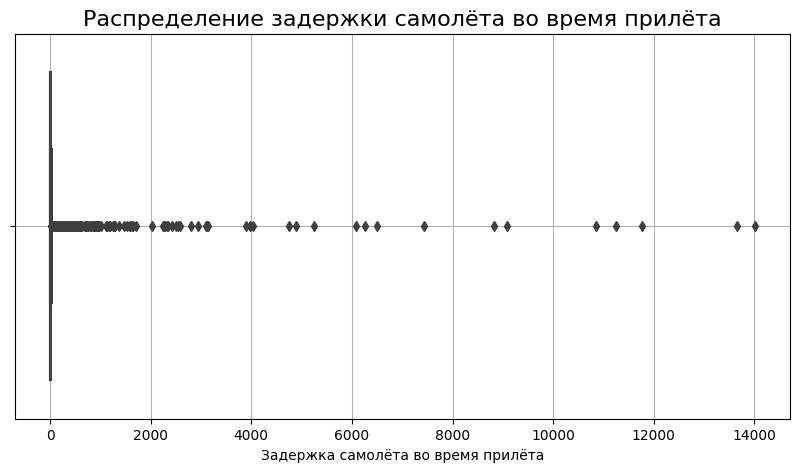

In [ ]:
# Построим боксплот по распределению задержки самолёта при прилёте
plt.figure(figsize=(10, 5))
sns.boxplot(x = clients['arrival_delay_in_minutes']);
plt.title('Распределение задержки самолёта во время прилёта', fontsize = 16)
plt.xlabel('Задержка самолёта во время прилёта')
plt.grid()
plt.show()

Опять видно много выбросов.

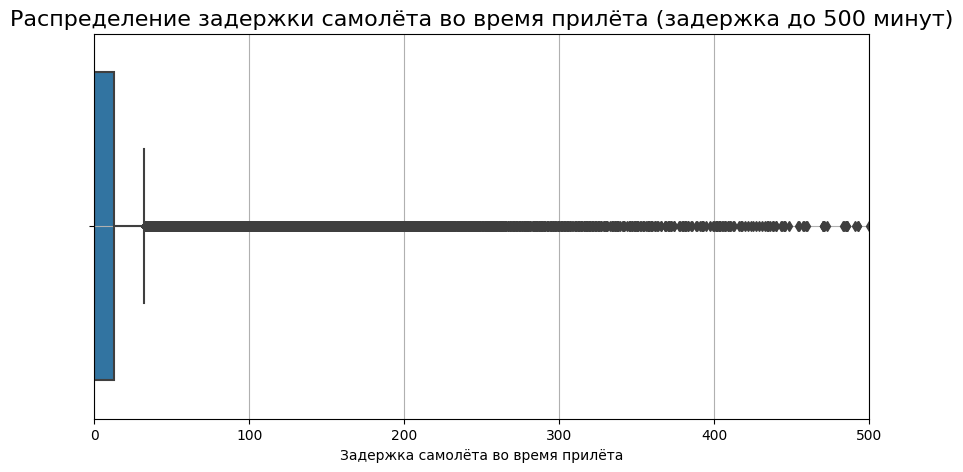

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = clients['arrival_delay_in_minutes']);
plt.xlim([0, 500])
plt.title('Распределение задержки самолёта во время прилёта (задержка до 500 минут)', fontsize = 16)
plt.xlabel('Задержка самолёта во время прилёта')
plt.grid()
plt.show()

Из графика видно, что при прилёте задержки более 30 минут - редкость. Посчитаем их.

In [ ]:
print('Количество строк с аномалиями в задержке при прилёте:', clients[clients['arrival_delay_in_minutes'] > 30]['id'].count())
print('Процент от общего объема:', round(clients[clients['arrival_delay_in_minutes'] > 30]['id'].count()/clients.shape[0] * 100, 2), '%')

Количество строк с аномалиями в задержке при прилёте: 18283
Процент от общего объема: 14.18 %


Аномальных задержек прилётов около 14%. Такое солидное количество нельзя удалять. При анализе надо учитывать эти выбросы.

## Исследовательский анализ данных

In [ ]:
# Посмотрим на общие доли клиентов в зависимости от их удовлетворённости сервисом
from plotly import graph_objects as go
fig=go.Figure(data=[
    go.Pie(
    labels=clients['satisfaction'],
    values=clients['id'],
    pull=[0.1, 0])
])
fig.update_layout(title='Доли клиентов по степени удовлетворённости')
fig

Круговой график показывает, что почти половина клиентов либо недовольна сервисом, либо относится к нему нейтрально. 20% результатов нам вообще неизвестны. Это большое количество, однако примим решение пожертвовать им ради бОльшей точности анализа.

In [ ]:
# Удалим строки с неизвестным уровнем удовлетворенности
clients = clients.loc[clients['satisfaction']!='unknown']

In [ ]:
# Проверим удаление
clients.shape

(103155, 24)

### Категориальные характеристики

Изучим категориальные характеристики с помощью столбчатых диаграмм.

In [ ]:
# Создадим функцию для отрисовки столбчатых диаграмм
def category_bar(data, column1, column2):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=column1, y=column2, data=data, hue='satisfaction')
    plt.title('Уровень удовлетворения для признака ' + column1)
    plt.xlabel('Количество клиентов')
    plt.ylabel(column2)
    plt.legend(title='Признак оттока')
    plt.show()

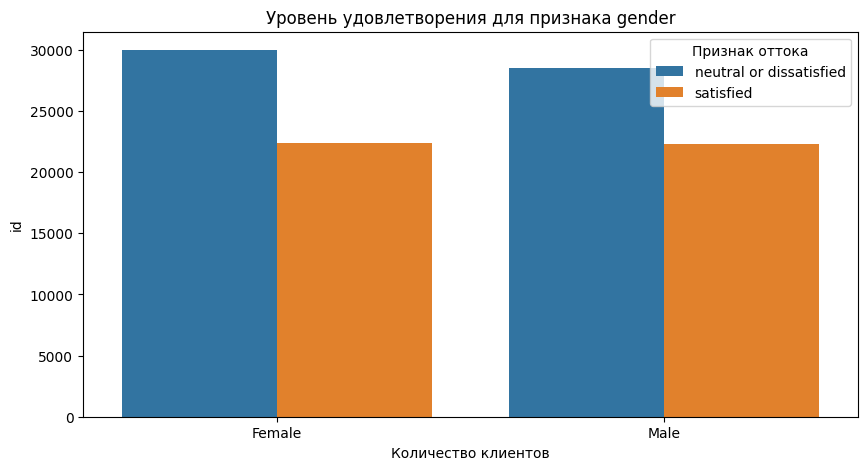

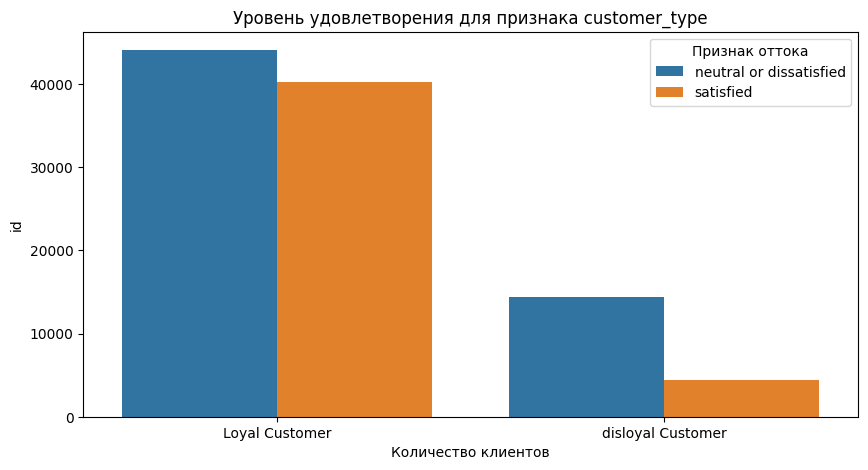

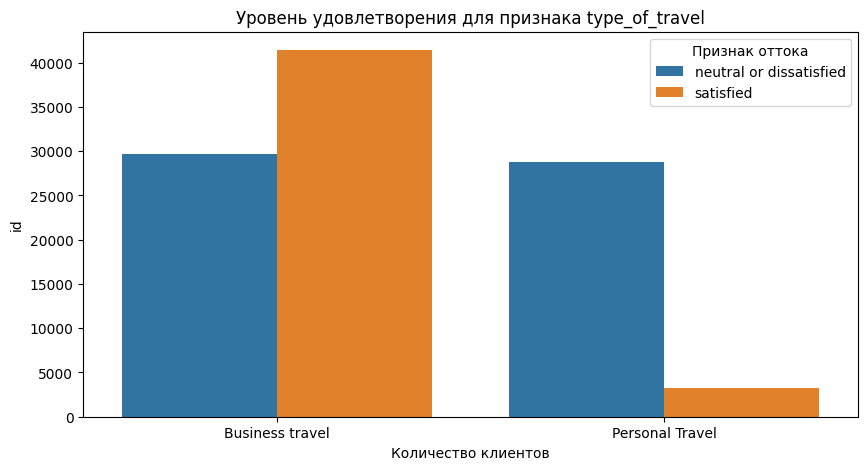

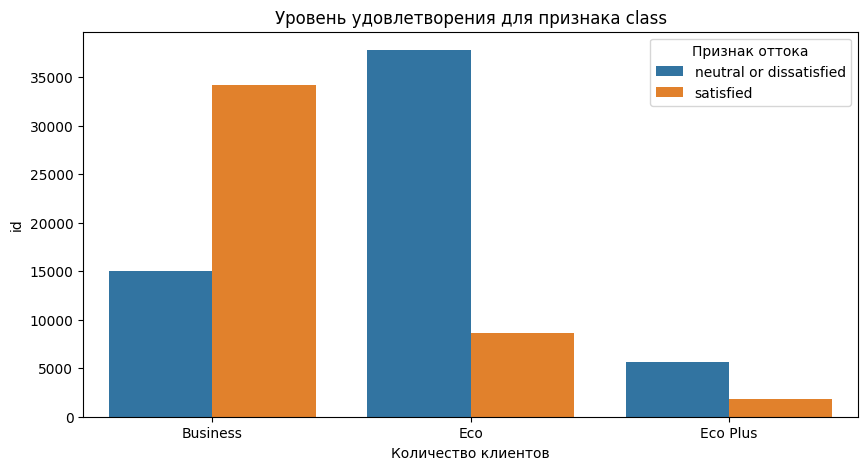

In [ ]:
# Нарисуем столбчатую диаграмму для каждого категориального столбца
columns = ['gender', 'customer_type', 'type_of_travel', 'class']
for col in columns:
    pivot = clients.pivot_table(index = [col, 'satisfaction'], values = 'id', aggfunc = 'count').reset_index()
    category_bar(pivot, col, 'id')

Из приведённых выше графиков можем сделать следующие выводы:
- распределение по полу примерно одинаковое,
- среди лояльных клиентов гораздо выше уровень удовлетворения. чем среди нелояльных,
- среди командированных доля довольных клиентов значительно выше, чем среди туристов,
- среди пассажиров, летящих бизнес-классом, значительно выше уровень удовлетворённости.

### Непрерывные характеристики

Воспользуемся гистограммами и столбиковыми диаграммами для того, чтобы изучить распределение непрерывных величин.

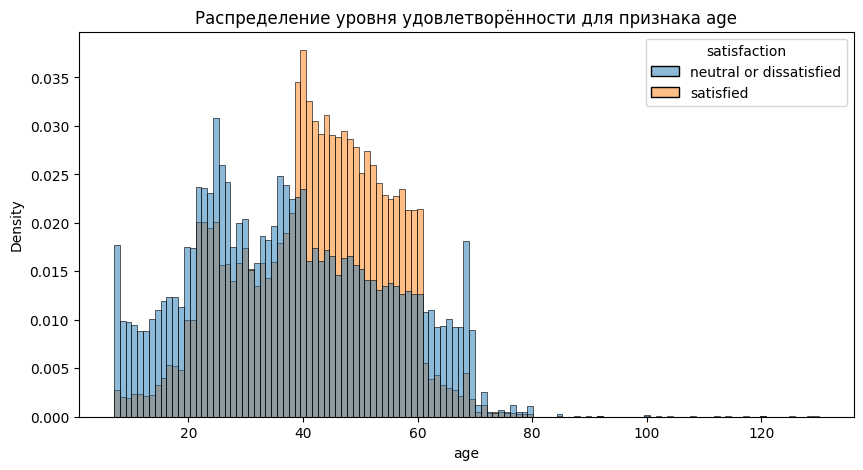

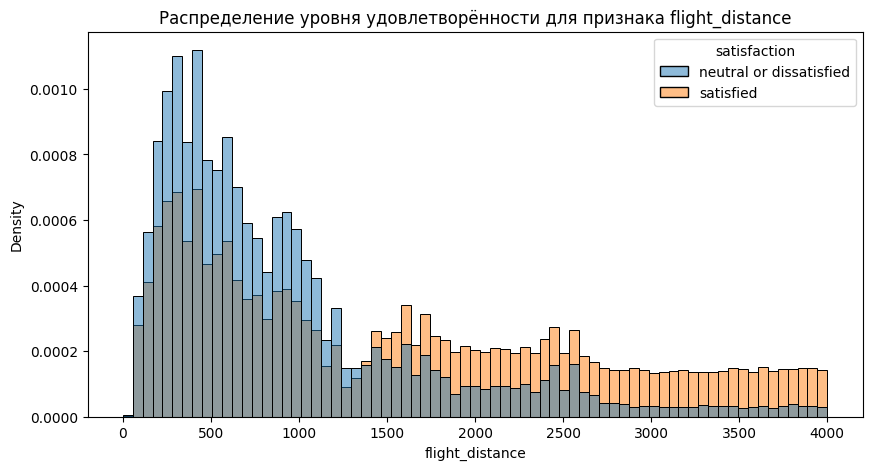

In [ ]:
# Построим гистограммы для колонок "возраст" и "длина полёта"
columns = ['age', 'flight_distance']
for col in columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data = clients, x = col, hue = 'satisfaction', stat="density", common_norm = False, palette = "tab10")
    plt.title('Распределение уровня удовлетворённости для признака ' + col)
    plt.show()

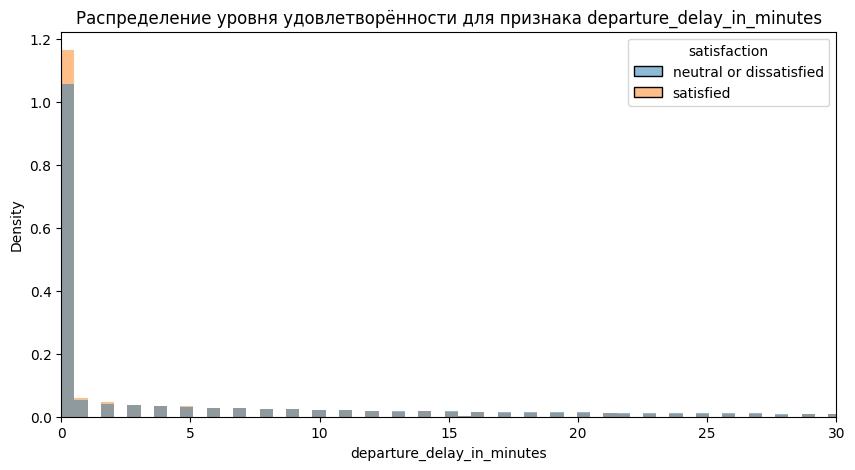

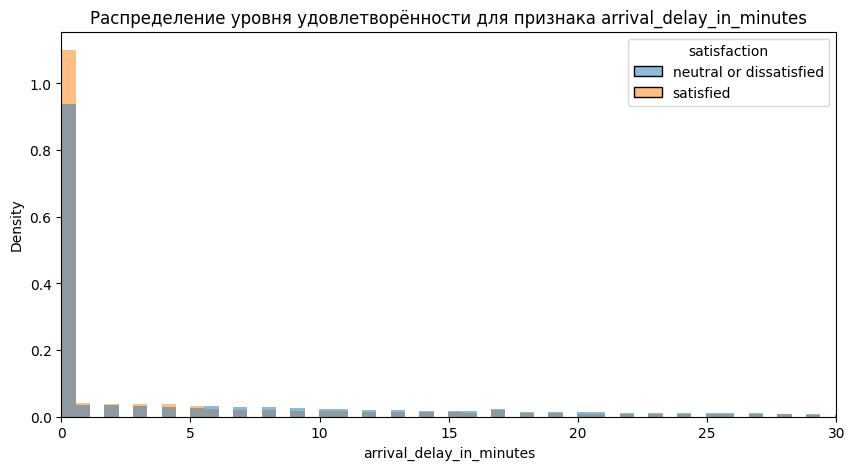

In [ ]:
# Построим гистограмму для столбцов "задержка при вылете" и "задержка при прилёте" с учетом аномальных значений
columns = ['departure_delay_in_minutes', 'arrival_delay_in_minutes']
for col in columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data = clients, x = col, hue = 'satisfaction', stat="density", common_norm = False, palette = "tab10")
    plt.xlim(0, 30)
    plt.title('Распределение уровня удовлетворённости для признака ' + col)
    plt.show()

Построим столбчатые диаграммы для оставшихся непрерывных характеристик.

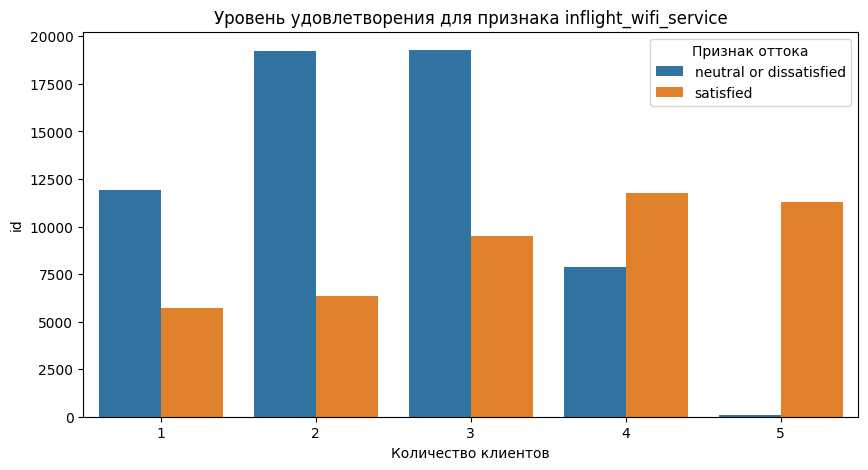

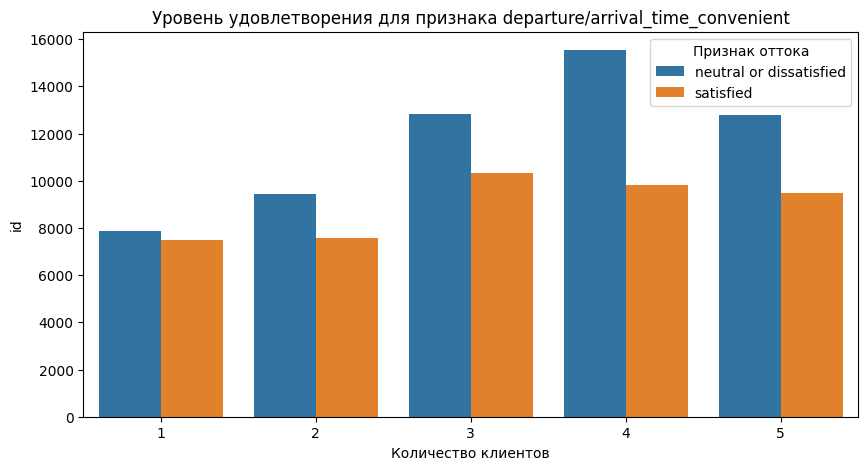

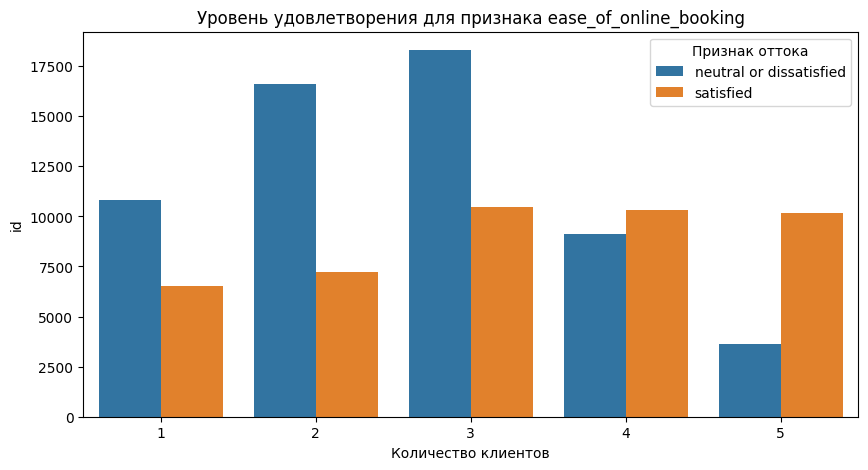

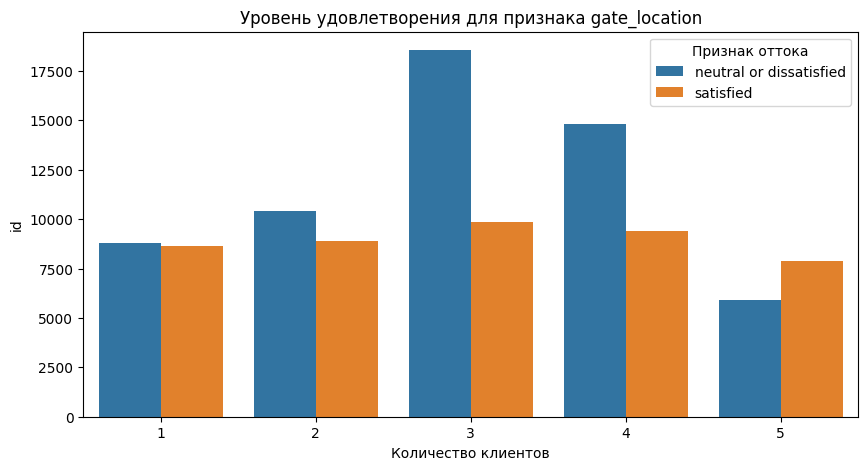

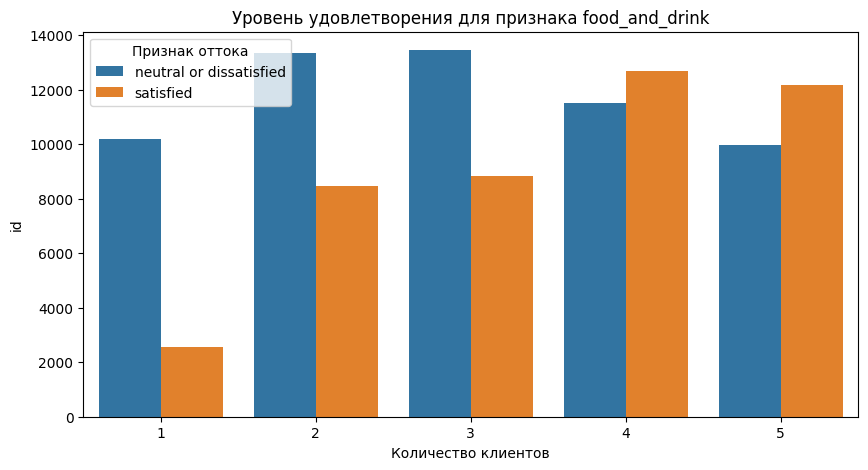

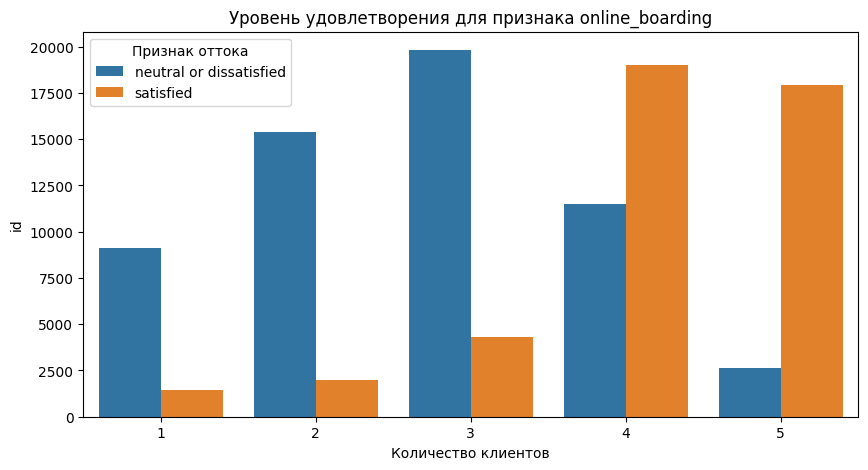

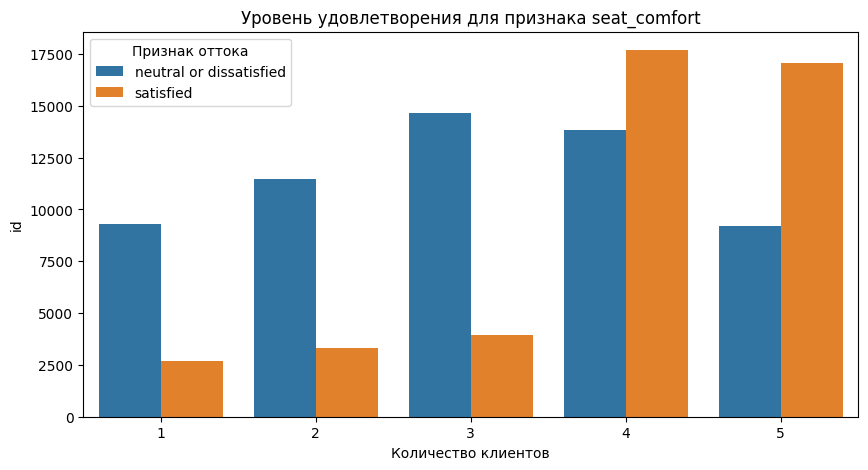

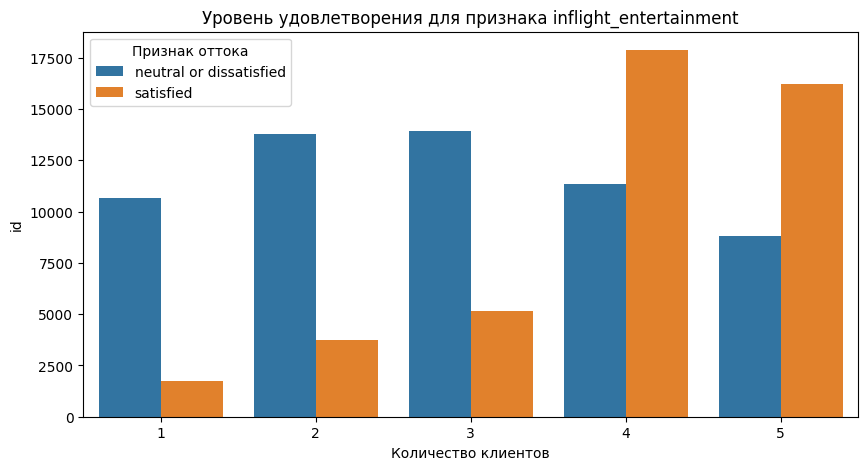

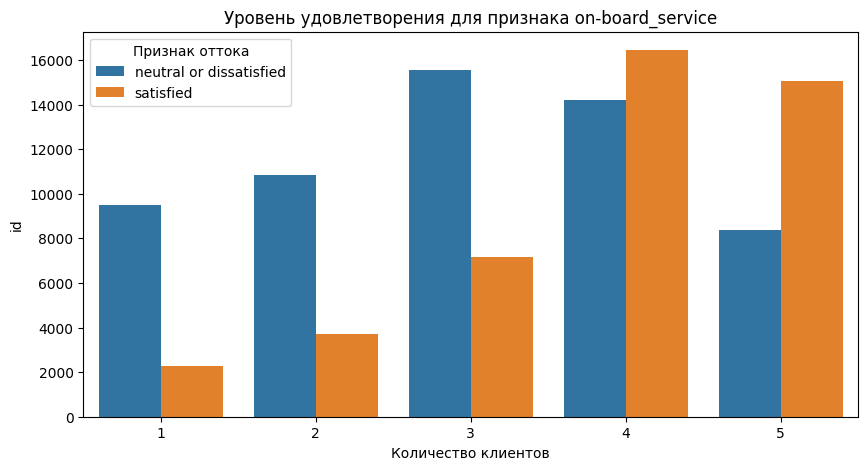

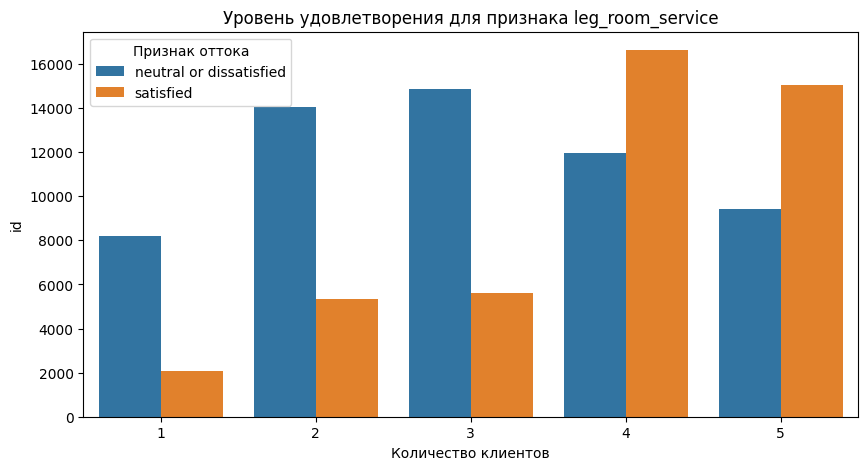

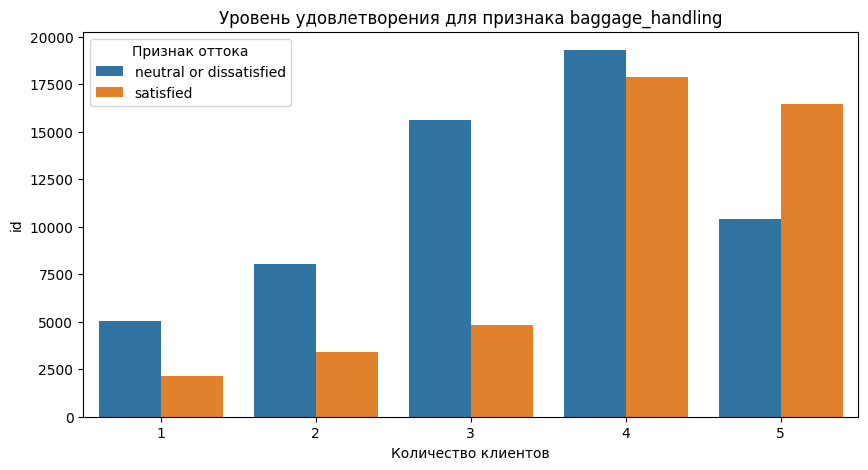

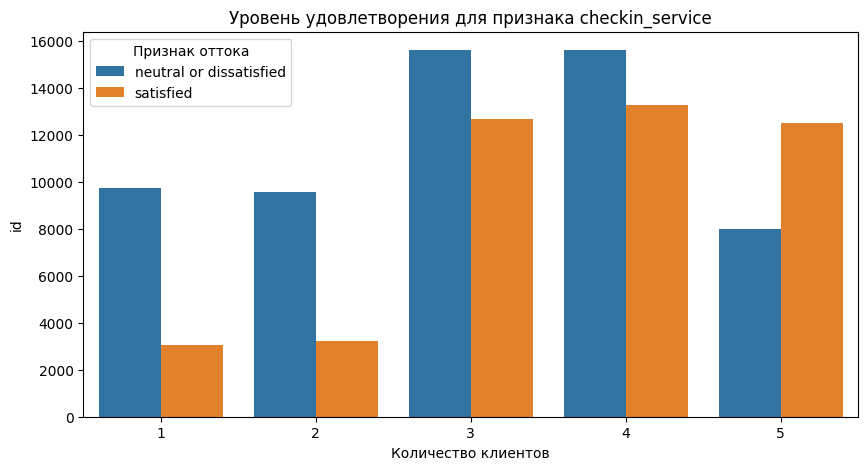

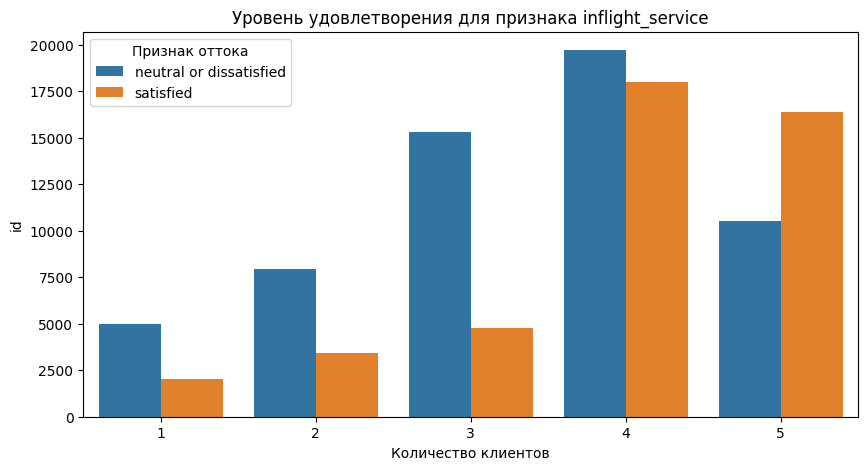

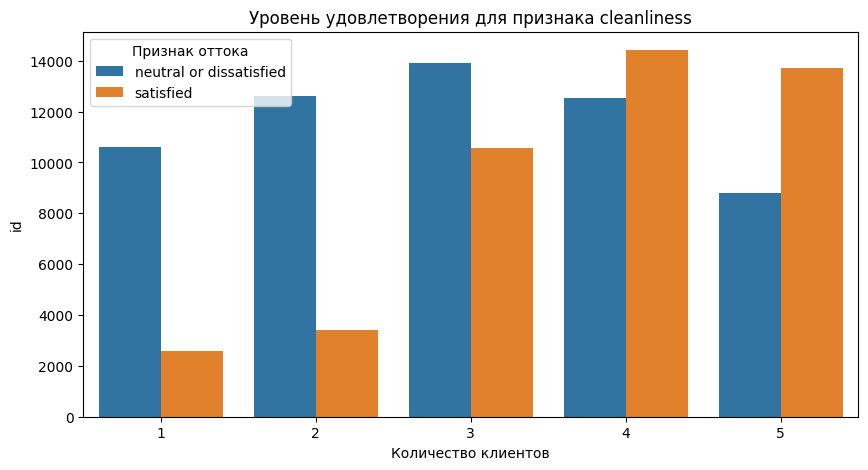

In [ ]:
# Нарисуем столбчатую диаграмму для оставшихся категориальных столбцов
columns = ['inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment',\
           'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']
for col in columns:
    pivot = clients.pivot_table(index = [col, 'satisfaction'], values = 'id', aggfunc = 'count').reset_index()
    category_bar(pivot, col, 'id')

Анализ непрерывных величин показал следующее:
- в возрастной категории от 38 до 60 лет значительно больше довольных клиентов,
- при дальности полётов более 1500 миль доля довольных клиентов выше, чем недовольных,
- задержки при вылете и прилёте до 30 минут не оказывают значительного влияния на уровень удовлетворённости сервисом,
- менее половины клиентов довольны следующими критериями: inflight_service, departure/arrival_time, ease_of_online_booking, gate_location, seat_comfort, on_board_service, leg_room_service, bagagge_handling, inflight_service
- половина и более клиентов довольны следующими критериями: food_and_drink, online_boarding, inflight_entertainment, check_in_service, cleanliness.

### Матрица корреляции Пирсона

Матрица Пирсона помогает находить линейные связи между характеристиками.

In [ ]:
# Преобразуем категориальные значения столбца в числовые, чтобы можно было его использовать в дальнейшем анализе
clients = pd.get_dummies(clients, columns=['satisfaction'])

In [ ]:
pirson = clients.drop(['id'], axis=1).corr()
pirson.style.background_gradient(cmap='coolwarm')

<ipython-input-43-1ab5a8548baf>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



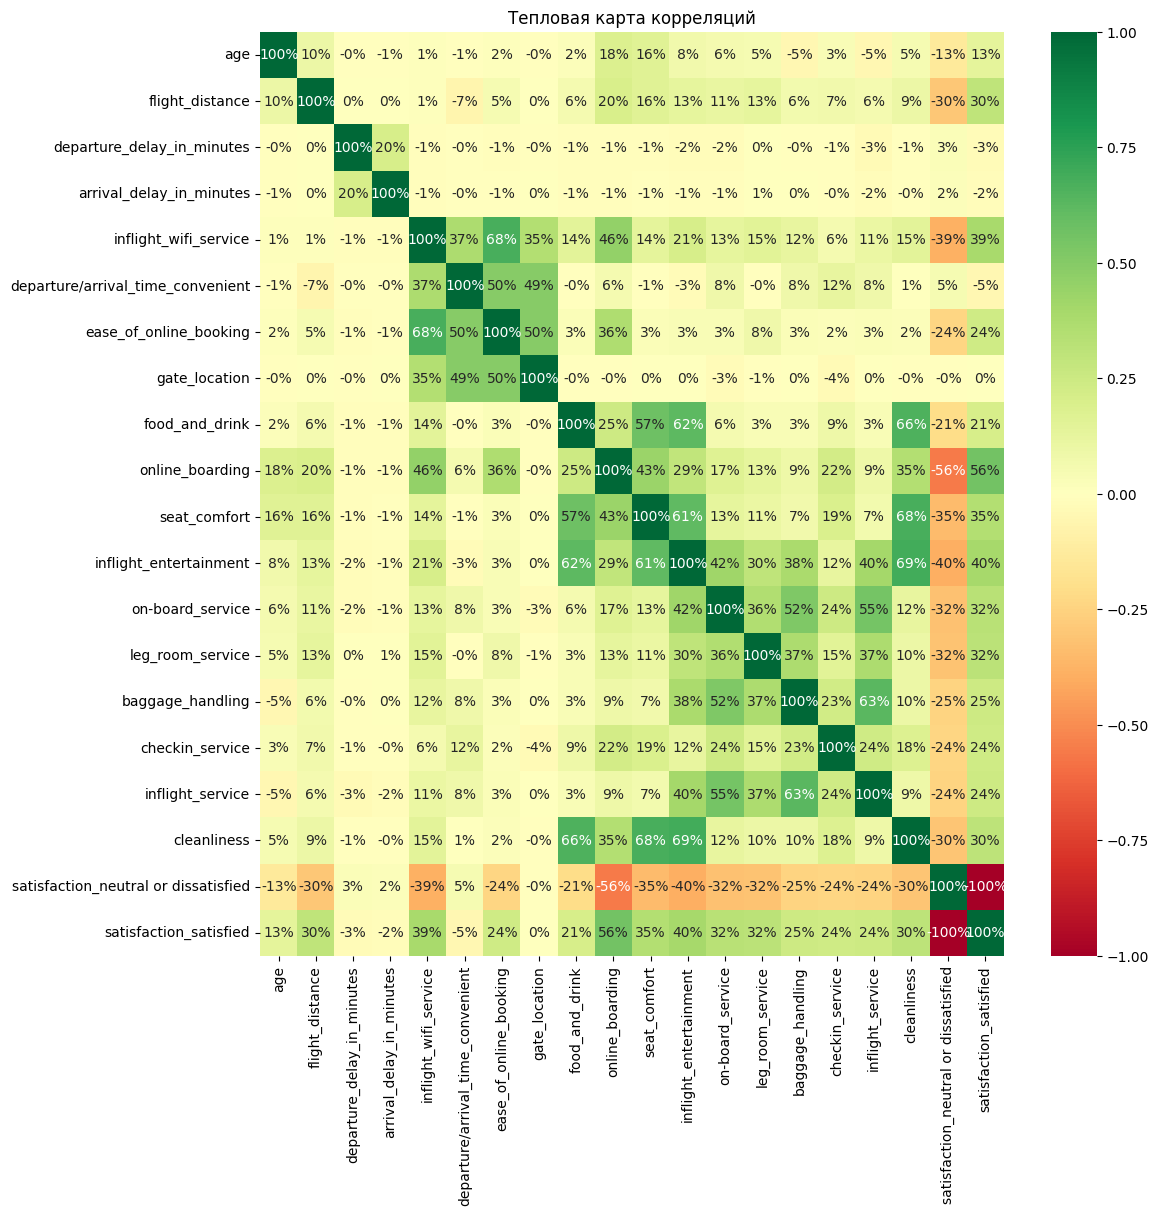

In [ ]:
# Построим тепловую карту на основе матрицы корреляции Пирсона
plt.figure(figsize = (12,12))
sns.heatmap(pirson, annot = True, fmt = ".0%", cmap = "RdYlGn", center = 0);
plt.title('Тепловая карта корреляций')
plt.show()

Присутствует средняя положительная линейная связь между удовлетворённостью клиента и следующими характеристиками:
- flight_distance,
- inflight_wifi_service,
- online_boarding,
- seat_comfort,
- inflight_entertainment,
- on_board_service,
- leg_room_service,
- cleanliness.

Присутствует слабая положительная линейная связь между удовлетворённостью клиента и следующими характеристиками:
- ease_of_online_booking,
- food_and_drink,
- baggage_handling,
- check_in_service,
- inflight_sservice.

### Машинное обучение

Разделим исходный датасет clients на 2 части. В части Х будут храниться все признаки, в части у - целевая переменная (уровень удовлетворенности сервисом).

In [ ]:
X = clients.drop(['satisfaction_neutral or dissatisfied', 'satisfaction_satisfied'], axis=1)

y = clients[['satisfaction_neutral or dissatisfied', 'satisfaction_satisfied']]

In [ ]:
y = y.apply(lambda x: x.argmax(), axis=1).values

Разделим данные на тренировочную и тестовую выборки.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Поскольку категориальные данные невозможно использовать при обучении модели, их надо перевести в числовые данные. Используем для этого onehot-кодировку. После этого масштабируем все данные, чтобы верно оценить вклад каждого признака в формирование отношения пассажира к сервису.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

categorical = ['gender', 'customer_type', 'type_of_travel', 'class']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

Обучим модель.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter = 1000)

model.fit(X_train_transformed, y_train)

pred = model.predict_proba(X_test_transformed)[:,1]

Оценим вклад каждого признака в формирование удовлетворённости полетом.

In [ ]:
model.coef_

array([[ 0.00762832, -2.2819734 , -2.869027  , -0.92216444, -1.15743297,
        -0.59146384, -0.78007311,  0.10926804, -3.40847824, -2.08228331,
         3.28879939, -1.00835783,  0.80990249, -0.77552358, -0.13021974,
         3.14431453,  0.25295948,  0.11155492,  1.25511677,  1.06335296,
         0.52443039,  1.38338114,  0.60949712,  0.85900568]])

In [59]:
# Не понимаю, почему код не работает
#importances = pd.DataFrame(data={
    #'Attribute': X_train.columns,
    #'Importance': model.coef_[0]
#})
#importances = importances.sort_values(by='Importance', ascending=False)

ValueError: ignored

Выведем матрицу ошибок.

In [ ]:
from sklearn.metrics import confusion_matrix
y_test2 = y_test.astype(int)
pred2 = pred.round()
cm = confusion_matrix(y_test2, pred2)

cm

array([[10538,  1189],
       [ 1170,  7734]])

Посчитаем полноту модели.

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test2, pred2)

0.8685983827493261

Посчитаем точность модели.

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test2, pred2)

0.8667488512832007

Попробуем найти такое пороговое значение, при котором модель будет находить максимальное число клиентов, удовлетворённых сервисом.

In [ ]:
probs = model.predict_proba(X_test_transformed)

In [64]:
classes = probs[:,1] > 0.05

confusion_matrix(y_test2, classes), recall_score(y_test2, classes), precision_score(y_test2, classes)

(array([[5980, 5747],
        [ 146, 8758]]),
 0.983602875112309,
 0.603791795932437)

### Выводы:
В исследовании использован датасет clients.csv. Данные были почищены и подготовлены для анализа и визуализации. Было проанализировано 24 аспекта авиаперелёта на предмет клиентской удовлетворённости.

Анализ категориальных характеристик показал следующее:
- пол клиента не влияет на его удовлетворённость сервисом,
- среди лояльных клиентов гораздо выше уровень удовлетворения. чем среди нелояльных,
- среди командированных доля довольных клиентов значительно выше, чем среди туристов,
- среди пассажиров, летящих бизнес-классом, значительно выше уровень удовлетворённости.

Результаты анализа непрерывных величин:
- в возрастной категории от 38 до 60 лет значительно больше довольных клиентов,
- при дальности полётов более 1500 миль доля довольных клиентов выше, чем недовольных,
- задержки при вылете и прилёте до 30 минут не оказывают значительного влияния на уровень удовлетворённости сервисом,
- менее половины клиентов довольны следующими критериями: inflight_service, departure/arrival_time, ease_of_online_booking, gate_location, seat_comfort, on_board_service, leg_room_service, bagagge_handling, inflight_service
- половина и более клиентов довольны следующими критериями: food_and_drink, online_boarding, inflight_entertainment, check_in_service, cleanliness.

Интерпретация матрицы корреляции:
 - присутствует средняя положительная линейная связь между удовлетворённостью клиента и следующими характеристиками: flight_distance, inflight_wifi_service, online_boarding, seat_comfort, inflight_entertainment, on_board_service, leg_room_service, cleanliness,
 -  присутствует слабая положительная линейная связь между удовлетворённостью клиента и следующими характеристиками: ease_of_online_booking, food_and_drink,
baggage_handling, check_in_service, inflight_sservice.

Также была построена модель, предсказывающая удовлетворённость авиапассажира сервисом с такими характеристиками: полнота - 0.98, точность - 0.6.